In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
data_df = pd.read_csv('../../datasets/AdultCensusIncomeForecast_train.csv')
data_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
'''
| age            | int64     | 나이           | max bound 이상은 max bound 처리 
| fnlwgt         | int64     | 가중치값       | 현재 표본에서 전체 인구를 추정할 때 
| education_num  | int64     | 교육 수준      | education과 같은 
| capital_gain   | int64     | 자본 이득      | 0인 값에 대한 쏠림 
| capital_loss   | int64     | 자본 손실      | 0인 값에 대한 쏠림   
| hours_per_week | int64     | 주당 근무 시간 | 주당 근무 시간 분포 알수 
| income         | object    | 소득 수준      | <=50K 또는 >50K 의 두가지 
'''

'\n| age            | int64     | 나이           | max bound 이상은 max bound 처리 \n| fnlwgt         | int64     | 가중치값       | 현재 표본에서 전체 인구를 추정할 때 \n| education_num  | int64     | 교육 수준      | education과 같은 \n| capital_gain   | int64     | 자본 이득      | 0인 값에 대한 쏠림 \n| capital_loss   | int64     | 자본 손실      | 0인 값에 대한 쏠림   \n| hours_per_week | int64     | 주당 근무 시간 | 주당 근무 시간 분포 알수 \n| income         | object    | 소득 수준      | <=50K 또는 >50K 의 두가지 \n'

### 검정 결과
- 검정 결과: 모든 연속형 변수 사이에 상관 계수가 abs(0.5)를 넘는 관계가 없어서 pearson, spearman Test 수행 못함. 다른 검정 방법 필요  

In [37]:
data_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week' ]].corr() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [44]:
continue_df = data_df[['age','education_num','hours_per_week' ]]

<Axes: ylabel='fnlwgt'>

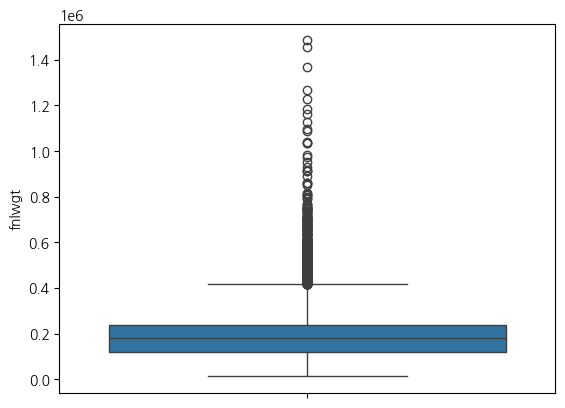

In [85]:
sns.boxplot(data_df['fnlwgt'])

<Axes: >

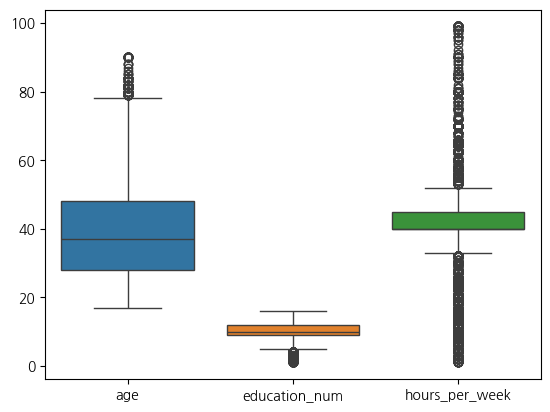

In [45]:
sns.boxplot(continue_df)

In [46]:
continue_df = data_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week' ]]
continue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education_num   32561 non-null  int64
 3   capital_gain    32561 non-null  int64
 4   capital_loss    32561 non-null  int64
 5   hours_per_week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


### 이상치를 제거 해 본다면? 

In [82]:
data_df['capital_gain'] = data_df[data_df['capital_gain'] > 0]['capital_gain']
data_df['capital_loss'] = data_df[data_df['capital_loss'] > 0]['capital_loss']


In [84]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  int64  
 5   marital_status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   gender          32561 non-null  object 
 10  capital_gain    2712 non-null   float64
 11  capital_loss    1519 non-null   float64
 12  hours_per_week  32561 non-null  int64  
 13  native_country  31978 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [83]:
data_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week' ]].corr() 


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.079547,0.205260,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.011239,-0.036108,-0.018768
education_num,0.036527,-0.043195,1.000000,0.255357,0.112188,0.148123
capital_gain,0.079547,0.011239,0.255357,1.000000,NaN,0.168624
capital_loss,0.205260,-0.036108,0.112188,NaN,1.000000,0.112345
hours_per_week,0.068756,-0.018768,0.148123,0.168624,0.112345,1.000000


### pearson test 

In [65]:
stats.pearsonr(data_df['age'], data_df['fnlwgt'])

PearsonRResult(statistic=-0.07664586787504059, pvalue=1.266170224837084e-43)

In [66]:
stats.pearsonr(data_df['age'], data_df['education_num'])

PearsonRResult(statistic=0.03652718946410612, pvalue=4.305718002010542e-11)

In [67]:
stats.pearsonr(data_df['age'], data_df['capital_gain'])

PearsonRResult(statistic=0.07767449816599378, pvalue=9.284129402834806e-45)

In [68]:
stats.pearsonr(data_df['age'], data_df['capital_loss'])

PearsonRResult(statistic=0.05777453947897481, pvalue=1.7427585117894673e-25)

In [69]:
stats.pearsonr(data_df['age'], data_df['hours_per_week'])

PearsonRResult(statistic=0.0687557075095574, pvalue=2.0112855621091698e-35)

In [70]:
stats.pearsonr(data_df['education_num'], data_df['fnlwgt'])


PearsonRResult(statistic=-0.043194632733022986, pvalue=6.306190682658129e-15)

In [71]:
stats.pearsonr(data_df['education_num'], data_df['capital_gain'])


PearsonRResult(statistic=0.12263011469222315, pvalue=2.6757645806709968e-109)

In [72]:
stats.pearsonr(data_df['education_num'], data_df['capital_loss'])


PearsonRResult(statistic=0.07992295668664696, pvalue=2.719650187578505e-47)

In [73]:
stats.pearsonr(data_df['education_num'], data_df['hours_per_week'])


PearsonRResult(statistic=0.14812273262291165, pvalue=4.236647479010242e-159)

In [74]:
stats.pearsonr(data_df['fnlwgt'], data_df['capital_gain'])


PearsonRResult(statistic=0.0004318857918868262, pvalue=0.9378842414093732)

In [75]:
stats.pearsonr(data_df['fnlwgt'], data_df['capital_loss'])


PearsonRResult(statistic=-0.01025171167533108, pvalue=0.06433303814593581)

In [76]:
stats.pearsonr(data_df['fnlwgt'], data_df['hours_per_week'])


PearsonRResult(statistic=-0.018768490610745158, pvalue=0.0007069233419722711)

In [77]:
stats.pearsonr(data_df['capital_gain'], data_df['capital_loss'])


PearsonRResult(statistic=-0.03161506295222803, pvalue=1.1563483959247178e-08)

In [78]:
stats.pearsonr(data_df['capital_gain'], data_df['hours_per_week'])


PearsonRResult(statistic=0.07840861539013533, pvalue=1.4080454108584002e-45)

In [79]:
stats.pearsonr(data_df['capital_loss'], data_df['hours_per_week'])


PearsonRResult(statistic=0.05425636227265099, pvalue=1.1572647639060033e-22)

### 정규 분포 여부 
- 모두 정규 분포 따른다?

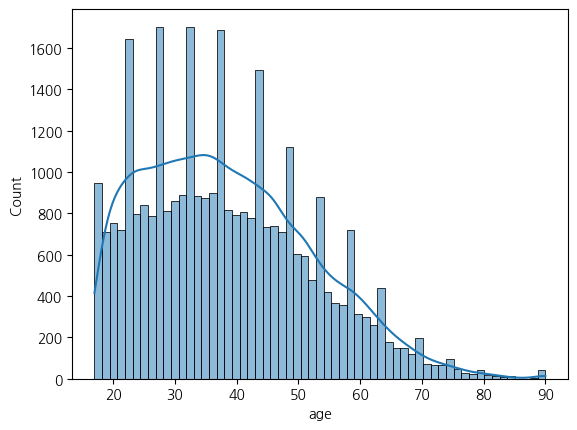

In [59]:
sns.histplot(data=continue_df, x='age',kde=True)
plt.show()

In [47]:
results = stats.anderson(continue_df['age'])
results

AndersonResult(statistic=238.08301913675677, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=38.58164675532078, scale=13.640432553581341)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [48]:
results.significance_level, results.critical_values

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))

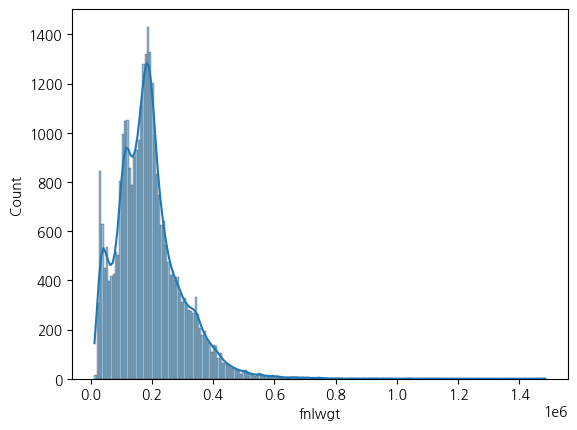

In [60]:
sns.histplot(data=continue_df, x='fnlwgt',kde=True)
plt.show()

In [49]:
results = stats.anderson(continue_df['fnlwgt'])
results

AndersonResult(statistic=386.78015772128856, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=189778.36651208502, scale=105549.97769702224)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [50]:
results.significance_level, results.critical_values

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))

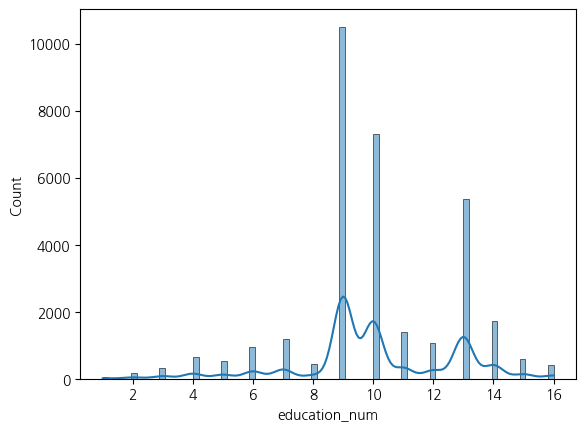

In [61]:
sns.histplot(data=continue_df, x='education_num',kde=True)
plt.show()

In [51]:
results = stats.anderson(continue_df['education_num'])
results

AndersonResult(statistic=1104.344678516558, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=10.0806793403151, scale=2.5727203320673877)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [52]:
results.significance_level, results.critical_values

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))

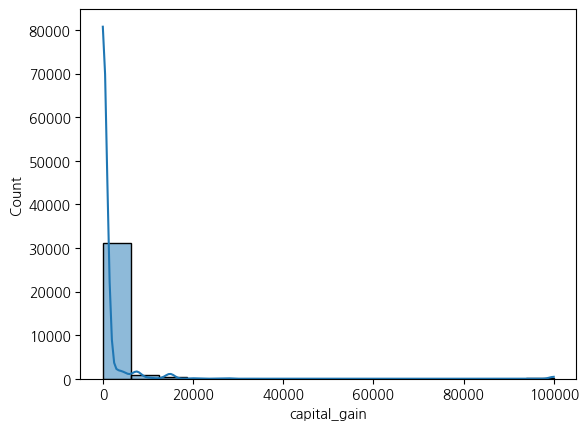

In [62]:
sns.histplot(data=continue_df, x='capital_gain',kde=True)
plt.show()

In [57]:
results = stats.anderson(continue_df['capital_gain'])
results

AndersonResult(statistic=10462.487018786465, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1077.6488437087312, scale=7385.292084840338)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [58]:
results.significance_level, results.critical_values


(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))

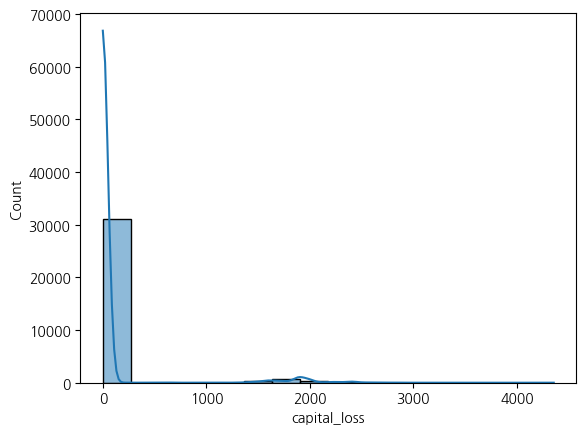

In [63]:
sns.histplot(data=continue_df, x='capital_loss',kde=True)
plt.show()

In [55]:
results = stats.anderson(continue_df['capital_loss'])
results

AndersonResult(statistic=11656.004573822924, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=87.303829734959, scale=402.9602186489998)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [56]:
results.significance_level, results.critical_values


(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))

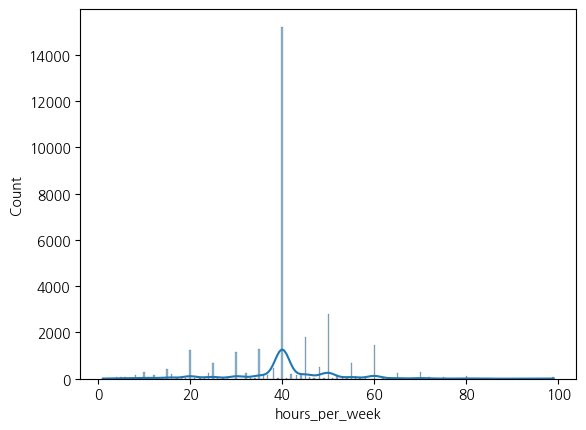

In [64]:
sns.histplot(data=continue_df, x='hours_per_week',kde=True)
plt.show()

In [53]:
results = stats.anderson(continue_df['hours_per_week'])
results

AndersonResult(statistic=1763.9255099086367, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=40.437455852092995, scale=12.347428681731843)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [54]:
results.significance_level, results.critical_values


(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))